# Using plot_date and label rotation

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, timedelta
import random
import numpy as np

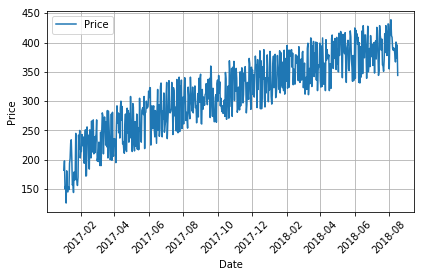

In [2]:
data_date = start_date = date(2017,1,1)
end_date = date.today()
dates = []
price = []

for i in range((end_date - start_date).days):
    data_date = data_date + timedelta(days=1)
    dates.append(mdates.date2num(data_date))
    price.append(random.randint(100 + int(10*i**(1/2)),200 + int(10*i**(1/2))))

price= np.array(price)
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

ax1.plot_date(dates, price,'-', label='Price')

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
    
ax1.grid(True)#, color='g', linestyle='-', linewidth=5)

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()


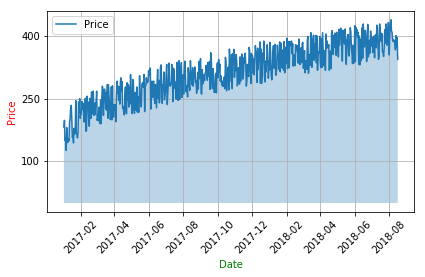

In [3]:

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

ax1.plot_date(dates, price,'-', label='Price')

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
    
ax1.grid(True)#, color='g', linestyle='-', linewidth=5)

ax1.xaxis.label.set_color('g')
ax1.yaxis.label.set_color('r')

ax1.set_yticks([100,250,400,550]) # Y-axis will show value only 100,250,400,550

ax1.fill_between(dates, 0, price, alpha=0.3) # fill graph with color

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()

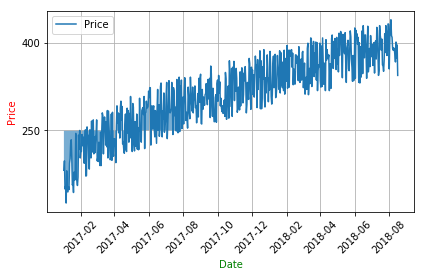

In [4]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

ax1.plot_date(dates, price,'-', label='Price')

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
    
ax1.grid(True)#, color='g', linestyle='-', linewidth=5)

ax1.xaxis.label.set_color('g')
ax1.yaxis.label.set_color('r')

ax1.set_yticks([100,250,400,550]) # Y-axis will show value only 100,250,400,550

ax1.fill_between(dates[:200], 250, price[:200], alpha=0.6) # fill graph with color

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()

In [10]:

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

ax1.plot_date(dates, price,'-', label='Price')

ax1.plot([],[],linewidth=5, label='loss', color='r',alpha=0.5)
ax1.plot([],[],linewidth=5, label='gain', color='g',alpha=0.5)


for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
    
ax1.grid(True)#, color='g', linestyle='-', linewidth=5)

ax1.xaxis.label.set_color('g')
ax1.yaxis.label.set_color('r')

ax1.set_yticks([100,250,400,550]) # Y-axis will show value only 100,250,400,550

#ax1.fill_between(dates[:200],250,price[:200] , alpha=0.6) # fill graph with color
ax1.fill_between(price[:200], price[:200], 300, facecolor='g', alpha=0.5)
ax1.fill_between(price[:200], price[:200], 300, facecolor='r', alpha=0.5)


plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()


ValueError: ordinal must be >= 1